In [1]:
import pandas as pd
import numpy as np
from numpy.random import normal as normal
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.animation as animation
import matplotlib
from matplotlib import rc
from IPython.display import HTML, Image

## Define Body Parts List and Segment Lists 

In [3]:
full_body = []
right_arm = []
left_arm =[]
left_leg = []
right_leg = []
head = []

def partPosNOrien(part,source):
    source.append(part+"x")
    source.append(part+"y")
    source.append(part+"z")
    source.append("Pitch_"+part+"_orientation")
    source.append("Yaw_"+part+"_orientation")
    source.append("Roll_"+part+"_orientation")
    return source
body_parts = ["pelvis", "naval", "chest", "neck", "clavicle_left", "shoulder_left", "elbow_left", "wrist_left", "hand_left", "handtip_left", "thumb_left", "clavicle_right", "shoulder_right", "elbow_right", "wrist_right", "hand_right", "handtip_right", "thumb_right", "hip_left", "knee_left", "ankle_left", "foot_left", "hip_right", "knee_right", "ankle_right", "foot_right", "head", "nose", "eye_left", "ear_left", "eye_right", "ear_right"]
for part in body_parts:
    full_body = partPosNOrien(part,full_body)
    if part in ["neck","head", "nose", "eye_left", "ear_left", "eye_right", "ear_right"]:
        head = partPosNOrien(part,head)
    if part in ["clavicle_left", "shoulder_left", "elbow_left", "wrist_left", "hand_left", "handtip_left", "thumb_left"]:
        left_arm = partPosNOrien(part,left_arm)
    if part in ["clavicle_right", "shoulder_right", "elbow_right", "wrist_right", "hand_right", "handtip_right", "thumb_right"]:
        right_arm = partPosNOrien(part,right_arm)
    if part in ["hip_left", "knee_left", "ankle_left", "foot_left"]:
        left_leg = partPosNOrien(part,left_leg)
    if part in ["hip_right", "knee_right", "ankle_right", "foot_right"]:
        right_leg = partPosNOrien(part,right_leg)

print(left_arm)
print(head)

['clavicle_leftx', 'clavicle_lefty', 'clavicle_leftz', 'Pitch_clavicle_left_orientation', 'Yaw_clavicle_left_orientation', 'Roll_clavicle_left_orientation', 'shoulder_leftx', 'shoulder_lefty', 'shoulder_leftz', 'Pitch_shoulder_left_orientation', 'Yaw_shoulder_left_orientation', 'Roll_shoulder_left_orientation', 'elbow_leftx', 'elbow_lefty', 'elbow_leftz', 'Pitch_elbow_left_orientation', 'Yaw_elbow_left_orientation', 'Roll_elbow_left_orientation', 'wrist_leftx', 'wrist_lefty', 'wrist_leftz', 'Pitch_wrist_left_orientation', 'Yaw_wrist_left_orientation', 'Roll_wrist_left_orientation', 'hand_leftx', 'hand_lefty', 'hand_leftz', 'Pitch_hand_left_orientation', 'Yaw_hand_left_orientation', 'Roll_hand_left_orientation', 'handtip_leftx', 'handtip_lefty', 'handtip_leftz', 'Pitch_handtip_left_orientation', 'Yaw_handtip_left_orientation', 'Roll_handtip_left_orientation', 'thumb_leftx', 'thumb_lefty', 'thumb_leftz', 'Pitch_thumb_left_orientation', 'Yaw_thumb_left_orientation', 'Roll_thumb_left_orien

## Load Normal and Seizure Body Frame Data

In [ ]:
df = pd.read_csv('p4Seizure1.csv') # Reads a csc file into a dataframe
df2 = pd.read_csv('p4Normal1.csv') # Reads a csc file into a dataframe
columns = list(df)

print(len(list(df)))

## Generate DataFrame Containing Velocity and Acceleration of Seizure body frame data

In [4]:
full_body_df = df[full_body]
full_body_positions = []
full_body_x_positions = []
full_body_x_velocity_dict = {}
full_body_x_acceleration_dict = {}
full_body_y_positions = []
full_body_y_velocity_dict = {}
full_body_y_acceleration_dict = {}
full_body_z_positions = []
full_body_z_velocity_dict = {}
full_body_z_acceleration_dict = {}
full_body_orientations = []
vel_time = np.divide(list(df["Azure_time"])[1:],1000000).tolist()
accl_time = np.divide(list(df["Azure_time"])[2:],1000000).tolist()
for name in full_body:
    if "orientation" not in name:
        full_body_positions.append(name)
        if name[-1] == 'x':
            full_body_x_positions.append(name)
            full_body_x_velocity_dict[name] = []
            full_body_x_acceleration_dict[name] =[]
            for i in range(0,len(list(df[name]))-1):
                delta_time = (list(df["Azure_time"])[i+1]-list(df["Azure_time"])[i])/1000000
                delta_x = (list(df[name])[i+1]-list(df[name])[i])
                full_body_x_velocity_dict[name].append(delta_x/delta_time)
            for i in range(0,len(list(df[name]))-2):
                delta_time = (list(df["Azure_time"])[i+1]-list(df["Azure_time"])[i])/1000000
                delta_vx = (full_body_x_velocity_dict[name][i+1]-full_body_x_velocity_dict[name][i])
                full_body_x_acceleration_dict[name].append(delta_vx/delta_time)
        elif name[-1] == 'y':
            full_body_y_positions.append(name)
            full_body_y_velocity_dict[name] = []
            full_body_y_acceleration_dict[name] =[]
            for i in range(0,len(list(df[name]))-1):
                delta_time = (list(df["Azure_time"])[i+1]-list(df["Azure_time"])[i])/1000000
                delta_y = (list(df[name])[i+1]-list(df[name])[i])
                full_body_y_velocity_dict[name].append(delta_y/delta_time)
            for i in range(0,len(list(df[name]))-2):
                delta_time = (list(df["Azure_time"])[i+1]-list(df["Azure_time"])[i])/1000000
                delta_vy = (full_body_y_velocity_dict[name][i+1]-full_body_y_velocity_dict[name][i])
                full_body_y_acceleration_dict[name].append(delta_vy/delta_time)
        else:
            full_body_z_positions.append(name)
            full_body_z_velocity_dict[name] = []
            full_body_z_acceleration_dict[name] =[]
            for i in range(0,len(list(df[name]))-1):
                delta_time = (list(df["Azure_time"])[i+1]-list(df["Azure_time"])[i])/1000000
                delta_z = (list(df[name])[i+1]-list(df[name])[i])
                full_body_z_velocity_dict[name].append(delta_z/delta_time)
            for i in range(0,len(list(df[name]))-2):
                delta_time = (list(df["Azure_time"])[i+1]-list(df["Azure_time"])[i])/1000000
                delta_z = (full_body_z_velocity_dict[name][i+1]-full_body_z_velocity_dict[name][i])
                full_body_z_acceleration_dict[name].append(delta_z/delta_time)
    if "orientation" in name:
        full_body_orientations.append(name)
full_body_x_positions_df = full_body_df[full_body_x_positions]
full_body_y_positions_df = full_body_df[full_body_y_positions]
full_body_z_positions_df = full_body_df[full_body_z_positions]
print(full_body_x_positions_df.shape[0])
#print(full_body_x_positions_df.head())
#print(full_body_z_velocity_dict["clavicle_leftz"])
print(len(full_body_z_velocity_dict["clavicle_leftz"]))
print(full_body_z_acceleration_dict["clavicle_leftz"])
print(len(full_body_z_acceleration_dict["clavicle_leftz"]))

300
299
[-8878.56093447733, -4901.77791328941, 3745.639845571595, 7917.457489057323, -23253.905357998323, 28584.692275607664, -36102.629100167964, 29809.771657404923, -1750.293255864983, -18898.302008104944, 17101.76994805366, -2090.03602928042, -9770.156384312259, -25895.47443086627, 54195.1864763742, -11065.257244093957, -12076.516799853263, -28293.202035360177, 50188.13075237676, -20052.473041331377, -1082.5614199742038, -2587.9113928915635, -39295.65672010578, 87472.19948674129, -77781.63817099242, 52081.95849818282, -13773.730784558884, -4076.224407381835, -35283.205774597, 46399.93470922327, 3675.092933774873, -16604.576511308172, -13679.526137452807, 23492.88956338682, -10674.129022312312, -41968.21025031324, 56996.286997701696, 9066.325668140029, -20141.01553509795, -1735.1472055789295, -2010.9720599766326, -28629.060720080768, 61564.050196943164, -37399.8472808385, -50563.58398519874, 103387.43793091454, -50074.7088690373, -38837.197138133364, 62156.36627404755, -19270.5984583

## Generate DataFrame Containing Velocity and Acceleration of Normal body frame data

In [14]:
rest_body_df = df2[full_body]

rest_body_positions = []
rest_body_x_positions = []
rest_body_x_velocity_dict = {}
rest_body_x_acceleration_dict = {}
rest_body_y_positions = []
rest_body_y_velocity_dict = {}
rest_body_y_acceleration_dict = {}
rest_body_z_positions = []
rest_body_z_velocity_dict = {}
rest_body_z_acceleration_dict = {}
rest_body_orientations = []
vel_time2 = np.divide(list(df2["Azure_time"])[1:],1000000).tolist()
accl_time2 = np.divide(list(df2["Azure_time"])[2:],1000000).tolist()
for name in full_body:
    if "orientation" not in name:
        rest_body_positions.append(name)
        if name[-1] == 'x':
            rest_body_x_positions.append(name)
            rest_body_x_velocity_dict[name] = []
            rest_body_x_acceleration_dict[name] =[]
            for i in range(0,len(list(df2[name]))-1):
                delta_time = (list(df2["Azure_time"])[i+1]-list(df2["Azure_time"])[i])/1000000
                delta_x = (list(df2[name])[i+1]-list(df2[name])[i])
                rest_body_x_velocity_dict[name].append(delta_x/delta_time)
            for i in range(0,len(list(df2[name]))-2):
                delta_time = (list(df2["Azure_time"])[i+1]-list(df2["Azure_time"])[i])/1000000
                delta_vx = (rest_body_x_velocity_dict[name][i+1]-rest_body_x_velocity_dict[name][i])
                rest_body_x_acceleration_dict[name].append(delta_vx/delta_time)
        elif name[-1] == 'y':
            rest_body_y_positions.append(name)
            rest_body_y_velocity_dict[name] = []
            rest_body_y_acceleration_dict[name] =[]
            for i in range(0,len(list(df2[name]))-1):
                delta_time = (list(df2["Azure_time"])[i+1]-list(df2["Azure_time"])[i])/1000000
                delta_y = (list(df2[name])[i+1]-list(df2[name])[i])
                rest_body_y_velocity_dict[name].append(delta_y/delta_time)
            for i in range(0,len(list(df2[name]))-2):
                delta_time = (list(df2["Azure_time"])[i+1]-list(df2["Azure_time"])[i])/1000000
                delta_vy = (rest_body_y_velocity_dict[name][i+1]-rest_body_y_velocity_dict[name][i])
                rest_body_y_acceleration_dict[name].append(delta_vy/delta_time)
        else:
            rest_body_z_positions.append(name)
            rest_body_z_velocity_dict[name] = []
            rest_body_z_acceleration_dict[name] =[]
            for i in range(0,len(list(df2[name]))-1):
                delta_time = (list(df2["Azure_time"])[i+1]-list(df2["Azure_time"])[i])/1000000
                delta_z = (list(df2[name])[i+1]-list(df2[name])[i])
                rest_body_z_velocity_dict[name].append(delta_z/delta_time)
            for i in range(0,len(list(df2[name]))-2):
                delta_time = (list(df2["Azure_time"])[i+1]-list(df2["Azure_time"])[i])/1000000
                delta_z = (rest_body_z_velocity_dict[name][i+1]-rest_body_z_velocity_dict[name][i])
                rest_body_z_acceleration_dict[name].append(delta_z/delta_time)
    if "orientation" in name:
        rest_body_orientations.append(name)
rest_body_x_positions_df = rest_body_df[rest_body_x_positions]
rest_body_y_positions_df = rest_body_df[rest_body_y_positions]
rest_body_z_positions_df = rest_body_df[rest_body_z_positions]
print(rest_body_x_positions_df.min().min())
#print(rest_body_x_positions_df.head())
#print(rest_body_z_velocity_dict["clavicle_leftz"])
print(len(rest_body_z_velocity_dict["clavicle_leftz"]))
print(rest_body_z_acceleration_dict["clavicle_leftz"])
print(len(rest_body_z_acceleration_dict["clavicle_leftz"]))

-732.471558
999
[-674.4868697146935, 315.4930164677929, -190.41122619401676, 605.3085610512932, -209.0237912797946, -166.73969568598068, -365.3711301105002, 448.38715173834316, 300.9850211032447, -193.58829372244247, -171.2941380721371, -14.757464005057585, 43.586592091768246, 59.60122979473561, -262.44311894337284, 240.72086384692489, -37.72642890061637, 0.0, 747.335278402544, -770.4851937229026, 6.906297262354808, -402.03661133653304, 416.5538810953041, -144.9623720267584, -14.490573402186609, 14.939785113128254, 57.47180825905576, -2428.923010183716, 1925.8835214915644, 347.2237730580043, 191.4939800164676, 956.9484162648365, -185.39880589627145, -1583.9871849475755, -492.9665305152402, 272.19988034117017, 2519.214967384982, -3218.2218067964695, 3161.921680520685, -373.32960114282054, -1053.1634740113402, -885.6792847502387, 1137.0120720529499, -224.81132240504104, 940.1890415735273, -1750.5614904567499, 914.0280005898965, 1488.7398945085738, -275.4636476057667, -936.7526262955525, 

## Generate time based animated 3D plot of body tracking data based on determined dataframe, body segment, and desired label name

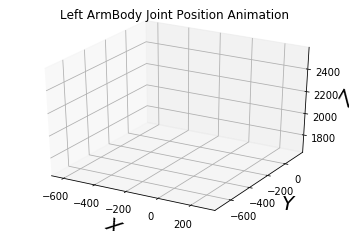

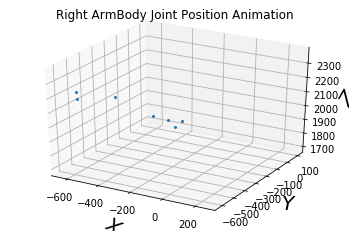

In [7]:
def bodyJointPos3Dani(full_body_df,bodySeg, name):
    body_x_positions = []
    body_y_positions = []
    body_z_positions = []
    for part in list(full_body_df):
        if part in bodySeg:
            if part[-1] == 'x':
                body_x_positions.append(part)
            if part[-1] == 'y':
                body_y_positions.append(part)
            if part[-1] == 'z':
                body_z_positions.append(part)
    body_x_positions_df = full_body_df[body_x_positions]
    body_y_positions_df = full_body_df[body_y_positions]
    body_z_positions_df = full_body_df[body_z_positions]
    body_x_positions_array = np.array(body_x_positions_df)
    body_y_positions_array = np.array(body_y_positions_df)
    body_z_positions_array = np.array(body_z_positions_df)
    
    

    nfr = full_body_df.shape[0] # Number of frames
    fps = 3 # Frame per sec
    xs = []
    ys = []
    zs = []
    for s in range(0,nfr,1):
        xs.append(body_x_positions_array[s])
        ys.append(body_y_positions_array[s])
        zs.append(body_z_positions_array[s])

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    sct, = ax.plot([], [], [], "o", markersize=2)
    def update(ifrm, xa, ya, za):
        sct.set_data(xa[ifrm], ya[ifrm])
        sct.set_3d_properties(za[ifrm])
    ax.set_xlim(body_x_positions_df.min().min()-20,body_x_positions_df.max().max()+20)
    ax.set_ylim(body_y_positions_df.min().min()-20,body_y_positions_df.max().max()+20)
    ax.set_zlim(body_z_positions_df.min().min()-20,body_z_positions_df.max().max()+20)
    ax.set_title(name + 'Body Joint Position Animation')
    ax.set_xlabel('$X$', fontsize=20, rotation=150)
    ax.set_ylabel('$Y$', fontsize=20)
    ax.set_zlabel('$Z$', fontsize=20, rotation=60)
    ax.yaxis._axinfo['label']['space_factor'] = 3.0
    ani = animation.FuncAnimation(fig, update, nfr, fargs=(xs,ys,zs), interval=1000/fps)
    return ani
bodyJointPos3Dani(full_body_df,left_arm,"Left Arm")
bodyJointPos3Dani(full_body_df,right_arm,"Right Arm")


## Generate time based animated plot of acceleration and velocity body tracking data based on determined dataframe body joint (from acceleration and velocity dictionaries) and desired label name

In [16]:
def velNacclAniPlots(Vt,V,At,A,name):
    x = Vt
    y = V
    rc('animation', html='html5')

    fig, axs = plt.subplots(1,2)
    fig.tight_layout(pad=3.0)
    lineV, = axs[0].plot(x, y, color='b')
    lineA, = axs[1].plot(x, y, color='r',)
    fig.subplots_adjust(top=.83)
    fig.suptitle(name, fontsize=16)
    axs[0].set_ylabel('mm/s')
    axs[0].set_xlabel('s')
    axs[0].set_title('Velocity v Time Plot')
    axs[1].set_ylabel('mm/s^2')
    axs[1].set_xlabel('s')
    axs[1].set_title('Acceleration v Time Plot')
    xA = At
    yA = A

    def update(num, x, y, lineV,xA,yA,lineA):
        lineV.set_data(x[:num], y[:num])
        lineV.axes.axis([0, 30, -200, 600])
        lineA.set_data(xA[:num], yA[:num])
        lineA.axes.axis([0, 30, -2000, 2000])
        return lineV, lineA,

    ani = animation.FuncAnimation(fig, update, len(x), fargs=[x, y, lineV,xA,yA,lineA],
                                  interval=20, blit=True)
       
    return ani

velNacclAniPlots(vel_time2,rest_body_z_velocity_dict["clavicle_leftz"],accl_time,rest_body_z_acceleration_dict["clavicle_leftz"],"clavicle_leftz")


ValueError: shape mismatch: objects cannot be broadcast to a single shape

ValueError: shape mismatch: objects cannot be broadcast to a single shape

<Figure size 432x288 with 2 Axes>

## Generate bar plot of count of normal and seizure data. Generate layered histogram of normal and seizure acceleration. Both based on determined dataframe joint (h0 for normal, h1 for seizure) and desired label name

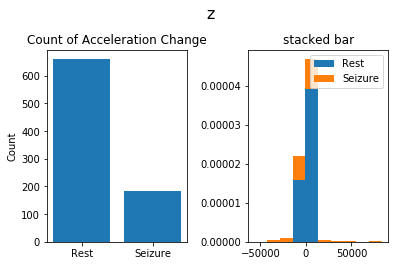

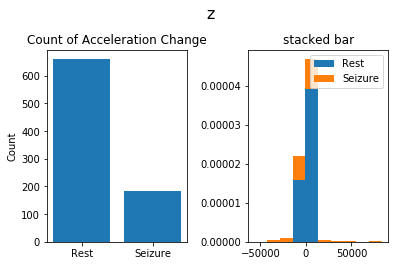

In [17]:
def acclCount(data):
    count = 0
    for i in range(0,len(data)-1):
        if (data[i] > 0 and data [i+1] <0):
            count +=1
        elif (data[i] < 0 and data[i+1] >0):
            count +=1
    return count
def acclHistNbarCount(h0A,h1A,name):
    fig, ax = plt.subplots(1,2)
    fig.tight_layout(pad=3.0)
    fig.subplots_adjust(top=.83)
    fig.suptitle(name, fontsize=16)
    ax[0].set_ylabel('Count')
    ax[0].set_title('Count of Acceleration Change')
    x = ['Rest', 'Seizure']
    y = [acclCount(h0A),acclCount(h1A)]
    z = [h0A,h1A]
    ax[0].bar(x,y)
    ax[1].hist(z, 10, density=True, histtype='bar', stacked=True)
    ax[1].set_title('stacked bar')
    ax[1].legend(x,loc='upper right')
    return fig
acclHistNbarCount(rest_body_z_acceleration_dict["clavicle_rightz"],full_body_z_acceleration_dict["clavicle_rightz"],"z")